In [36]:
import pandas as pd 
from sklearn.decomposition import KernelPCA 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy as np
import plotly.express as px
import nbformat
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import shap

In [2]:
data_c = pd.read_table("data/sequence_ogt_topt_features2_JF_19Jun22.tab")
data = pd.read_table("data/sequence_ogt_topt_features2_JF_19Jun22.tab")

In [3]:
temp = data["seq_TEMP"]
fig = px.box(data,y="seq_TEMP",points="all")
fig.show()

In [4]:
def temp_range_to_class(value):
    if value <= 20:
        return "very low"
    elif value <= 40 and value > 20:
        return "low"
    elif value <= 60 and value > 40:
        return "moderate"
    elif value <= 80 and value > 60:
        return "high"
    elif value <= 100 and value > 80:
        return "very high"
    
def temp_range_to_no(value):
    if value <= 20:
        return 0
    elif value <= 40 and value > 20:
        return 1
    elif value <= 60 and value > 40:
        return 2
    elif value <= 80 and value > 60:
        return 3
    elif value <= 100 and value > 80:
        return 4

In [5]:
data["range"] = data["seq_TEMP"].apply(temp_range_to_class)
data["range_2"] = data["seq_TEMP"].apply(temp_range_to_no)

In [6]:
data["range"].value_counts()

low          2129
high          306
moderate      255
very high     193
very low       34
Name: range, dtype: int64

In [7]:
data_c

,seq_id,seq_OGT,seq_TEMP,length,A,C,D,E,F,G,...,g_distance_21,g_distance_22,g_distance_23,g_distance_24,g_distance_25,g_distance_26,g_distance_27,g_distance_28,g_distance_29,g_distance_30
0,P43408,70.0,85,192.0,0.057292,0.005208,0.067708,0.093750,0.015625,0.072917,...,0.034347,0.032415,0.032451,0.032834,0.029978,0.030860,0.031718,0.030500,0.031564,0.030533
1,Q89GR3,30.0,26,334.0,0.128743,0.023952,0.065868,0.059880,0.053892,0.068862,...,0.034243,0.032303,0.031779,0.031747,0.034163,0.031319,0.032579,0.030562,0.034217,0.031188
2,Q60352,37.0,80,260.0,0.046154,0.003846,0.080769,0.046154,0.038462,0.076923,...,0.030898,0.032849,0.032089,0.031334,0.033246,0.032201,0.031122,0.029493,0.028413,0.031119
3,Q97X08,80.0,74,334.0,0.044910,0.000000,0.020958,0.029940,0.047904,0.059880,...,0.032492,0.031342,0.031397,0.032859,0.032442,0.032565,0.032662,0.033901,0.030358,0.032277
4,Q7B8C4,37.0,30,250.0,0.048000,0.016000,0.044000,0.108000,0.044000,0.076000,...,0.031849,0.033423,0.029825,0.032686,0.031649,0.033085,0.029445,0.031416,0.030575,0.030584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,Q6RKQ1,55.0,25,498.0,0.104418,0.016064,0.048193,0.024096,0.038153,0.130522,...,0.031495,0.033294,0.032700,0.033431,0.031767,0.032473,0.031684,0.032180,0.032142,0.031725
2913,P40025,37.0,28,321.0,0.034268,0.009346,0.080997,0.077882,0.052960,0.034268,...,0.033287,0.033860,0.035131,0.032420,0.029850,0.032820,0.030632,0.031953,0.032836,0.031808
2914,P00344,27.5,54,317.0,0.107256,0.006309,0.066246,0.059937,0.044164,0.088328,...,0.034578,0.032948,0.029866,0.032200,0.032059,0.032234,0.032014,0.029896,0.030861,0.031916
2915,C0LZ63,50.0,54,579.0,0.065630,0.012090,0.077720,0.065630,0.069085,0.051813,...,0.032182,0.032999,0.033771,0.032397,0.032886,0.033406,0.031966,0.033361,0.033047,0.032657


In [8]:
data = data.drop(["seq_id","seq_OGT","length"], axis = 1)
input_d = data.drop(["range","range_2"], axis = 1)
ouput_d = data["range"]
X, y = input_d, ouput_d
y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [9]:
data_in = pd.DataFrame(X)
data_in["range"] = y

C:\Users\venka\AppData\Local\Temp\ipykernel_20824\3107125918.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [10]:
data_in

,seq_TEMP,A,C,D,E,F,G,H,I,K,...,g_distance_22,g_distance_23,g_distance_24,g_distance_25,g_distance_26,g_distance_27,g_distance_28,g_distance_29,g_distance_30,range
0,85,0.057292,0.005208,0.067708,0.093750,0.015625,0.072917,0.010417,0.078125,0.093750,...,0.032415,0.032451,0.032834,0.029978,0.030860,0.031718,0.030500,0.031564,0.030533,3
1,26,0.128743,0.023952,0.065868,0.059880,0.053892,0.068862,0.032934,0.041916,0.017964,...,0.032303,0.031779,0.031747,0.034163,0.031319,0.032579,0.030562,0.034217,0.031188,1
2,80,0.046154,0.003846,0.080769,0.046154,0.038462,0.076923,0.011538,0.134615,0.107692,...,0.032849,0.032089,0.031334,0.033246,0.032201,0.031122,0.029493,0.028413,0.031119,0
3,74,0.044910,0.000000,0.020958,0.029940,0.047904,0.059880,0.008982,0.092814,0.026946,...,0.031342,0.031397,0.032859,0.032442,0.032565,0.032662,0.033901,0.030358,0.032277,0
4,30,0.048000,0.016000,0.044000,0.108000,0.044000,0.076000,0.032000,0.092000,0.056000,...,0.033423,0.029825,0.032686,0.031649,0.033085,0.029445,0.031416,0.030575,0.030584,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10640,20,0.080027,0.011396,0.065395,0.059703,0.045253,0.095165,0.033918,0.041166,0.045644,...,0.033856,0.033490,0.032011,0.032930,0.032704,0.030740,0.033673,0.032257,0.032539,4
10641,8,0.080660,0.015892,0.059132,0.078580,0.030721,0.084703,0.013420,0.082069,0.068671,...,0.031139,0.033152,0.031890,0.032999,0.031180,0.031091,0.031532,0.031940,0.032143,4
10642,12,0.089099,0.012536,0.055288,0.062471,0.037755,0.081486,0.022894,0.065354,0.062261,...,0.031428,0.033015,0.032028,0.032876,0.031768,0.031617,0.032051,0.031918,0.032915,4
10643,19,0.115864,0.014636,0.068147,0.059567,0.056780,0.103642,0.010884,0.031687,0.063857,...,0.031204,0.031655,0.033247,0.031581,0.032566,0.030875,0.033388,0.030671,0.030306,4


In [11]:
data_f = data_in.drop(["range"], axis = 1)
data_f["range"] = data_f["seq_TEMP"].apply(temp_range_to_class)
data_f["range"] = data_f["seq_TEMP"].apply(temp_range_to_no)


data_f = pd.DataFrame(data_f)
data_f

C:\Users\venka\AppData\Local\Temp\ipykernel_20824\2527911939.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



,seq_TEMP,A,C,D,E,F,G,H,I,K,...,g_distance_22,g_distance_23,g_distance_24,g_distance_25,g_distance_26,g_distance_27,g_distance_28,g_distance_29,g_distance_30,range
0,85,0.057292,0.005208,0.067708,0.093750,0.015625,0.072917,0.010417,0.078125,0.093750,...,0.032415,0.032451,0.032834,0.029978,0.030860,0.031718,0.030500,0.031564,0.030533,4
1,26,0.128743,0.023952,0.065868,0.059880,0.053892,0.068862,0.032934,0.041916,0.017964,...,0.032303,0.031779,0.031747,0.034163,0.031319,0.032579,0.030562,0.034217,0.031188,1
2,80,0.046154,0.003846,0.080769,0.046154,0.038462,0.076923,0.011538,0.134615,0.107692,...,0.032849,0.032089,0.031334,0.033246,0.032201,0.031122,0.029493,0.028413,0.031119,3
3,74,0.044910,0.000000,0.020958,0.029940,0.047904,0.059880,0.008982,0.092814,0.026946,...,0.031342,0.031397,0.032859,0.032442,0.032565,0.032662,0.033901,0.030358,0.032277,3
4,30,0.048000,0.016000,0.044000,0.108000,0.044000,0.076000,0.032000,0.092000,0.056000,...,0.033423,0.029825,0.032686,0.031649,0.033085,0.029445,0.031416,0.030575,0.030584,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10640,20,0.080027,0.011396,0.065395,0.059703,0.045253,0.095165,0.033918,0.041166,0.045644,...,0.033856,0.033490,0.032011,0.032930,0.032704,0.030740,0.033673,0.032257,0.032539,0
10641,8,0.080660,0.015892,0.059132,0.078580,0.030721,0.084703,0.013420,0.082069,0.068671,...,0.031139,0.033152,0.031890,0.032999,0.031180,0.031091,0.031532,0.031940,0.032143,0
10642,12,0.089099,0.012536,0.055288,0.062471,0.037755,0.081486,0.022894,0.065354,0.062261,...,0.031428,0.033015,0.032028,0.032876,0.031768,0.031617,0.032051,0.031918,0.032915,0
10643,19,0.115864,0.014636,0.068147,0.059567,0.056780,0.103642,0.010884,0.031687,0.063857,...,0.031204,0.031655,0.033247,0.031581,0.032566,0.030875,0.033388,0.030671,0.030306,0


In [12]:
data_xgb = data_f.drop(["seq_TEMP","range"], axis = 1)

In [13]:
data_xgb["seq_TEMP"] = data_f["seq_TEMP"]

C:\Users\venka\AppData\Local\Temp\ipykernel_20824\3998209971.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [14]:
import xgboost as xgb

model = xgb.XGBClassifier(
                         num_parallel_tree = 1,
                         max_depth = 10,
                         learning_rate = 0.1,
                         verbosity = 2,
                         booster = 'gbtree',
                         eval_metric= ['auc','merror'],
                         n_jobs = -1,
                         sampling_method ='gradient_based',
                         colsample_bytree = 0.5,
                         objective ='multi:softprob'
)
X_train, X_test, y_train, y_test = train_test_split(data_xgb, data_f["range"], test_size=0.3, random_state=42)

In [15]:
X_train = pd.DataFrame(X_train)
X_train.columns = data_xgb.columns
X_train_Cls = X_train.drop(["seq_TEMP"], axis = 1)

In [16]:
X_test = pd.DataFrame(X_test)
X_test.columns = data_xgb.columns
X_test_Cls = X_test.drop(["seq_TEMP"], axis = 1)

In [17]:
model.fit(X_train_Cls,y_train,eval_set=[(X_test_Cls, y_test)])

[03:15:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=10
[03:15:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 252 extra nodes, 0 pruned nodes, max_depth=10
[03:15:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 162 extra nodes, 0 pruned nodes, max_depth=10
[03:15:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=10
[03:15:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba262

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['auc', 'merror'], feature_types=None, gamma=0,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [18]:
from sklearn.metrics import roc_auc_score
pred = model.predict_proba(X_test_Cls)
roc_auc_score(y_test,pred,multi_class='ovr')

0.9996720694582836

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

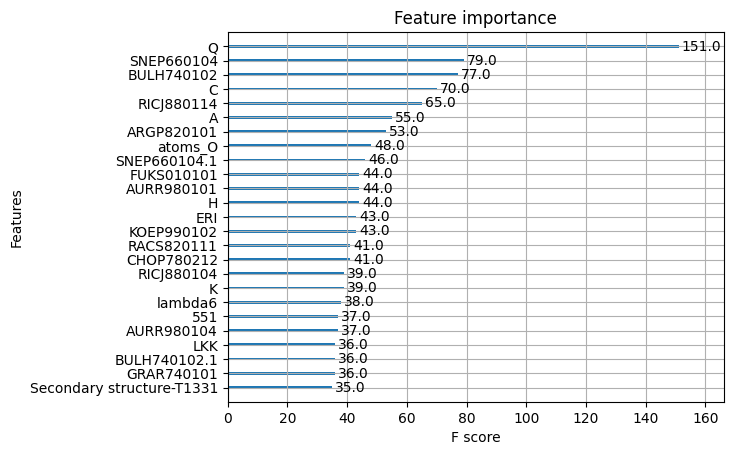

In [19]:
xgb.plot_importance(model, max_num_features = 25)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

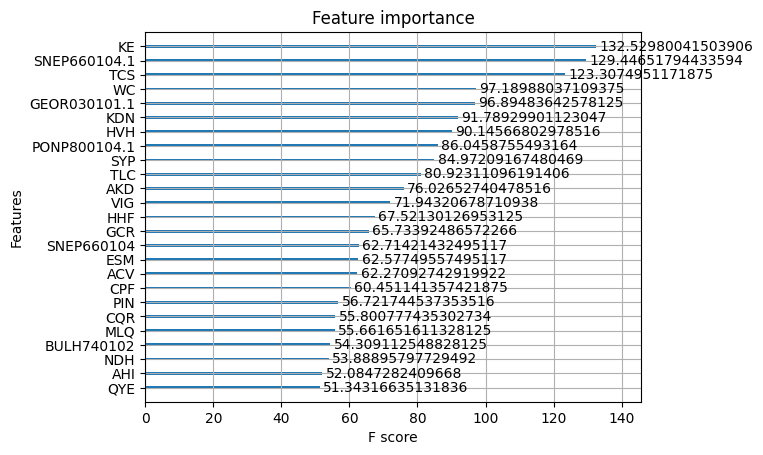

In [20]:
xgb.plot_importance(model, max_num_features = 25 ,importance_type = "gain")

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

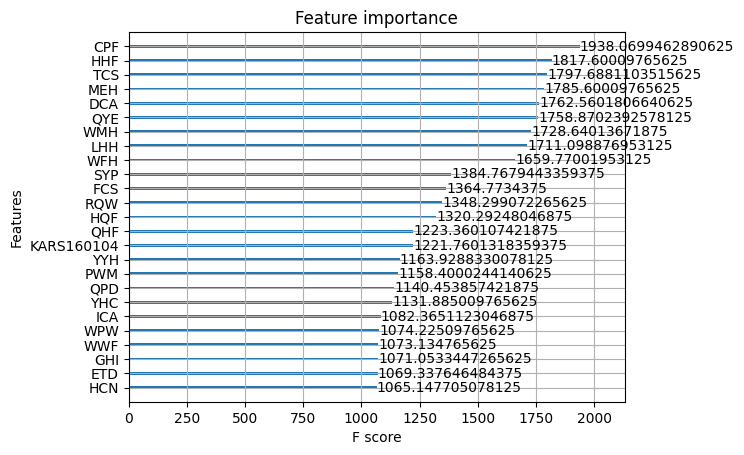

In [21]:
xgb.plot_importance(model, max_num_features = 25 ,importance_type = "cover")

In [22]:
pred_input_prob = model.predict_proba(X_train_Cls)
pred = model.predict(X_train_Cls)

In [23]:
pred_input_prob_test = model.predict_proba(X_test_Cls)
pred_test = model.predict(X_test_Cls)

In [24]:
pred_input = pd.DataFrame(pred_input_prob)
pred_input_test = pd.DataFrame(pred_input_prob_test)

In [25]:
pred_input_test

,0,1,2,3,4
0,0.004163,0.024887,0.033996,0.839366,0.097588
1,0.001241,0.003743,0.007812,0.961245,0.025958
2,0.999235,0.000281,0.000222,0.000173,0.000088
3,0.001664,0.004898,0.013323,0.970935,0.009180
4,0.997380,0.001437,0.000609,0.000307,0.000268
...,...,...,...,...,...
3189,0.998821,0.000519,0.000364,0.000186,0.000110
3190,0.000736,0.002372,0.985988,0.006879,0.004024
3191,0.998464,0.000405,0.000634,0.000346,0.000152
3192,0.998603,0.000471,0.000498,0.000248,0.000180


In [26]:
X_train['Class_vlow_prob'] = pred_input[0]
X_train['Class_low_prob'] = pred_input[1]
X_train['Class_mod_prob'] = pred_input[2]
X_train['Class_hig_prob'] = pred_input[3]
X_train['Class_vhig_prob'] = pred_input[4]
X_train['Class'] = pred


X_test['Class_vlow_prob'] = pred_input_test[0]
X_test['Class_low_prob'] = pred_input_test[1]
X_test['Class_mod_prob'] = pred_input_test[2]
X_test['Class_hig_prob'] = pred_input_test[3]
X_test['Class_vhig_prob'] = pred_input_test[4]
X_test['Class'] = pred_test


y_train = X_train["seq_TEMP"]
y_test  =  X_test["seq_TEMP"]
X_train = X_train.drop(["seq_TEMP"], axis = 1)
X_test = X_test.drop(["seq_TEMP"], axis = 1)

In [27]:
model = xgb.XGBRegressor(
                         num_parallel_tree = 1,
                         max_depth = 10,
                         learning_rate = 0.1,
                         verbosity = 2,
                         booster = 'gbtree',
                         n_jobs = -1,
                         sampling_method ='gradient_based',
                         colsample_bytree = 0.5,
                         objective ='reg:squarederror'
)

model.fit(X_train,y_train,eval_set=[(X_test, y_test)])

[03:21:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=8
[0]	validation_0-rmse:53.25357
[03:21:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=9
[1]	validation_0-rmse:47.97459
[03:21:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[2]	validation_0-rmse:43.22912
[03:21:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=8
[3]	validat

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [28]:
r2_scr = r2_score(y_test, model.predict(X_test))
print("The R squared value on test set: {:.4f}".format(r2_scr))

The R squared value on test set: 0.9643


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

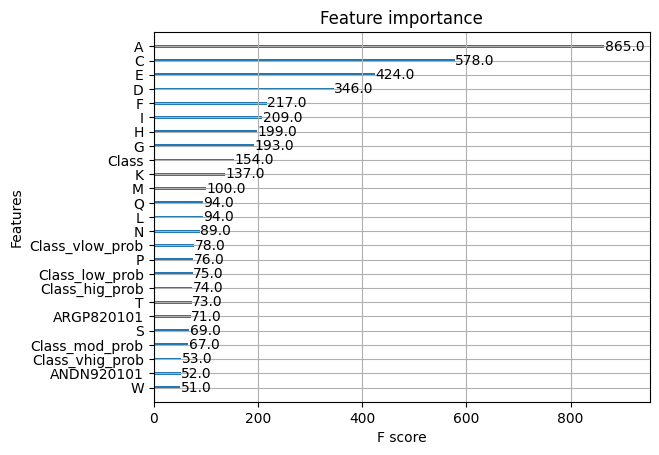

In [29]:
xgb.plot_importance(model, max_num_features = 25)

In [30]:
explainer = shap.TreeExplainer(model)


In [31]:
shap_values = explainer.shap_values(X_train)

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\core.py:122: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



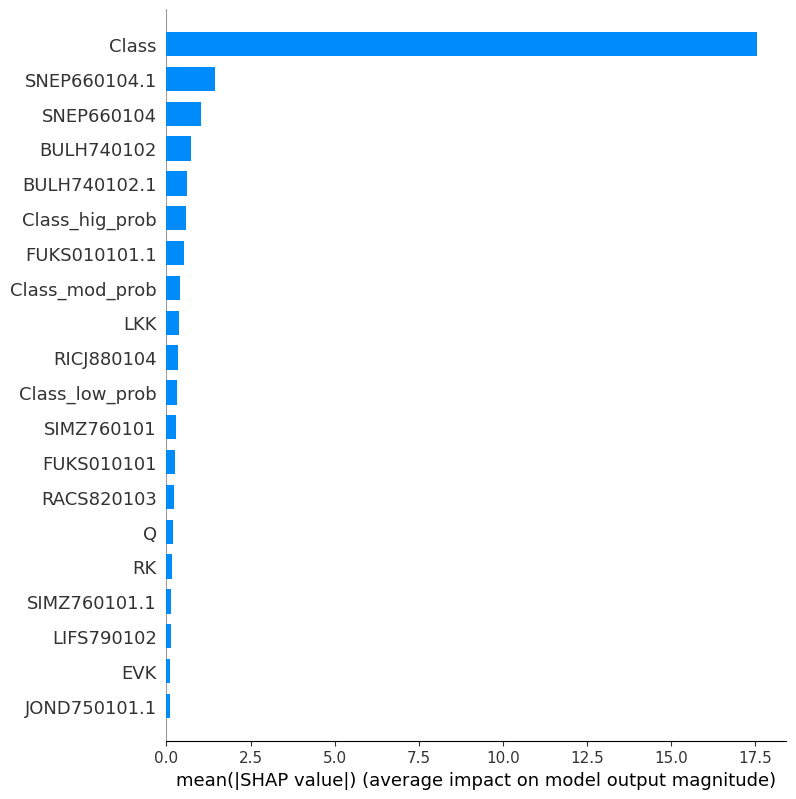

In [32]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

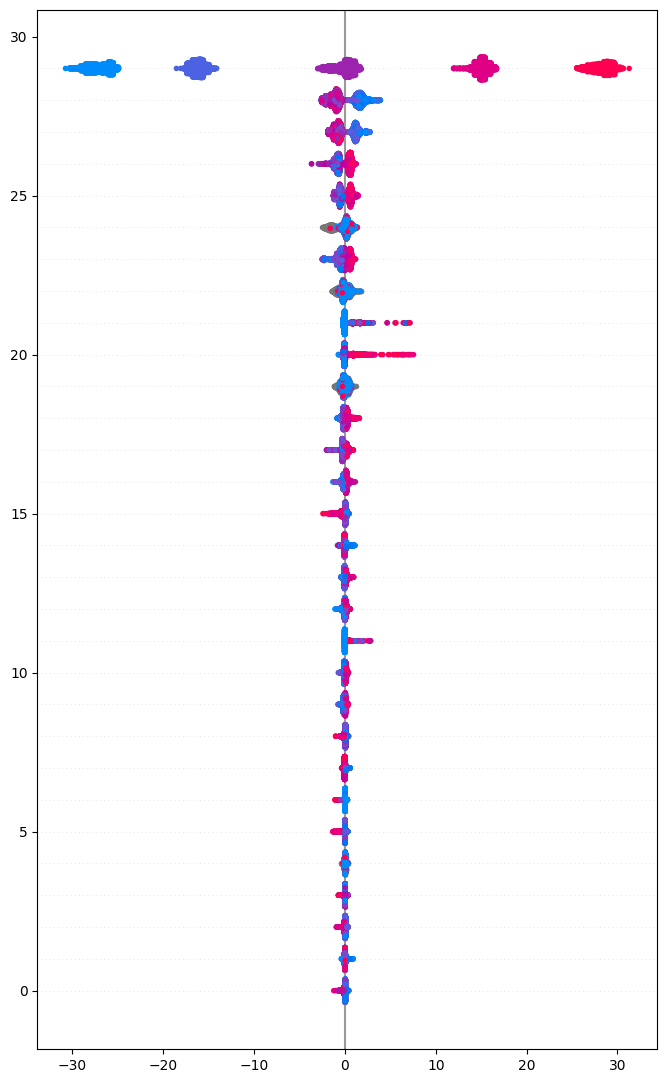

In [37]:
shap.summary_plot(shap_values, X_train, max_display = 30)